# Домашняя работа №1

## NumPy

Все задачи из блока ниже нужно решить, не используя циклов (for, while, list comprehension и так далее) в реализации. Также для каждой задачи нужно написать проверку: создать какой-то пример, написать для него решение и проверить, что реализованная функция для этого примера возвращает объект, который совпадает с решением. Например:

```
example = np.eye(5)
solution = 2 * np.eye(5)

result = double_all_elements(example)
assert np.allclose(result, solution)
```

In [1]:
import numpy as np

### Задание 1 (0.5 балла)

Реализуйте функцию, которая из двух векторов $X$ и $Y$ размерности $n$ строит матрицу размерности $(n, 2)$ ($n$ - произвольное)

In [2]:
def foo(X, Y):
    return np.column_stack((X, Y))

In [3]:
X = np.array([1, 2, 3, 3, 2, 1])
Y = np.array([4, 5, 6, 6, 5, 4])

solution = ([[[1, 4],
        [2, 5],
        [3, 6],
        [3, 6],
        [2, 5],
        [1, 4]]])
result = foo(X, Y)

assert np.allclose(result, solution)

### Задание 2  (0.5 балла)

Реализуйте функцию, которая для произвольной матрицы $X$ возвращает среднее значение положительных диагональных элементов

In [4]:
def mean_of_positive_diag(X):
    diag = np.diag(X)
    positive_diag = diag[diag > 0]
    res = np.mean(positive_diag)
    return res

In [5]:
matrix = np.array([[-500, 1],
                    [2, 3]])

solution = 3
result = mean_of_positive_diag(matrix)

assert np.allclose(result, solution)

### Задание 3  (0.5 балла)

Реализуйте функцию, которая для произвольной матрицы $X$ и произвольного числа $k$ заменяет все диагональные элементы матрицы на $k$ (функция не должна ничего возвращать, только модифицировать заданную матрицу)

In [6]:
def fill_diag(X, k):
    np.fill_diagonal(X , k)

In [7]:
matrix = np.array([[-500, 1],
                    [2, 3]])
k = 228

fill_diag(matrix, k)
matrix

array([[228,   1],
       [  2, 228]])

### Задание 4  (0.5 балла)

Реализуйте функцию, которая для произвольной матрицы $X$ и произвольного числа k возвращает вектор, состоящий из тех значений $x_{ij}$, для которых верно равенство $(i + j) \bmod k = 0$

In [8]:
def foo(X, k):
    m = np.fromfunction(lambda i, j: (i + j) % k == 0, X.shape, dtype=int)
    return X[m]

In [9]:
matrix = np.array([[-500, 1],
                    [2, 3]])
k = 2
foo(matrix, k)

solution = [-500, 3]
result = foo(matrix, k)

assert np.allclose(result, solution)

### Задание 5  (0.5 балла)

Реализуйте функцию, которая проверяет, являются ли две матрицы $X$ и $Y$ одинаковыми (совпадают размерности и значения), если их преобразовать в вектор построчно (например, для `np.array([[0, 1, 2], [3, 4, 5]])` построчное преобразование в вектор - это `np.array([0, 1, 2, 3, 4, 5])`. 

Функция должна возвращать `True`, если матрицы одинаковые, иначе `False`.

In [10]:
def equal(X, Y):
    x = np.ravel(X)
    y = np.ravel(Y)
    if(np.array_equal(x, y)):
        return True
    return False

In [11]:
X = np.array([[-500, 1],
                    [2, 3]])

Y = np.array([[-500, 1],
                    [2, 3]])

solution = True
result = equal(X, Y)

assert np.allclose(result, solution)

In [12]:
Z = np.array([[-500, -500],
                    [2, 3]])

A = np.array([[-500, 1],
                    [2, 3]])
solution = False
result = equal(Z, A)

assert np.allclose(result, solution)

### Задание 6 (1 балл)

В numpy пропущенное значение (`np.nan`) имеет тип `float`:

In [13]:
type(np.nan)

float

Из-за этого любой числовой массив, содержащий пропущенные значения, будет автоматически иметь тип `float`:

In [14]:
t = np.array([1, 2, 3, np.nan])
t

array([ 1.,  2.,  3., nan])

In [15]:
t.dtype

dtype('float64')

Реализуйте функцию, которая для произвольной матрицы $X$ будет заменять все пропущенные значения на среднее значение в соответствующей строке, округленное до целого. Также эта функция должна поменять тип матрицы с `float` на `int`, если она после этого преобразования состоит только из целых чисел (считаем, что `3.0` - это целое число). В этой задаче можно создать и вернуть новый объект.

In [16]:
def foo(X):
    means_of_rows = np.nanmean(X, axis=1)
    rounded_means_of_rows = np.round(means_of_rows)
    index_of_nans = np.where(np.isnan(X) == True)
    X[index_of_nans] = np.take(rounded_means_of_rows, index_of_nans[0])
    res = X.astype(int)
    return res

In [17]:
Z = np.array([[-500, np.nan],
                    [2, 3]])

solution = np.array([[-500, -500],
                    [2, 3]])
result = foo(Z)

assert np.allclose(result, solution)

### Задание 7 (1.5 балла)

С помощью библиотеки `numba` и декоратора `numba.njit` реализуйте функцию, которая для заданной матрицы, состоящей из положительных чисел, выполняет следующее:

1) Все нулевые элементы массива заменяются на случайное целое число от 0 до 100 (без создания копии массива);

2) Возвращает среднее значение квадратных корней элементов матрицы (то есть значение $K = \frac{1}{N\cdot M}\sum_{i=1}^N \sum_{j=1}^M \sqrt{x_{ij}}$);

Сравните скорость работы функции с декоратором и без декоратора. Попробуйте также задать разные значения `parallel` и `fastmath` при использовании декоратора. Опишите, как это влияет на скорость работы и попробуйте предположить, почему получаются такие результаты.

Матрица $X$ задана следующим образом:

In [18]:
X = np.random.randint(0, 1000, size=(1000, 100))

In [19]:
!pip install numba

$\textbf{Важно:}$ Попробуйте решить задачу без использования циклов. Если не получается сделать решение без циклов, то приведите реализацию с циклами.

In [20]:
from numba import njit


@njit
def foo1(X):
    X_array = X.ravel()
    X_array[X_array == 0] = np.random.randint(0, 100)
    X_shape=X.shape
    K = np.sum(np.sqrt(X))/X_shape[0]/X_shape[1]
    return X, K

In [21]:
import timeit

X = np.random.randint(0, 1000, size=(1000, 100))
%timeit foo1(X)

220 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
from numba import njit


@njit(parallel=True, fastmath=True)
def foo2(X):
    X_array = X.ravel()
    X_array[X_array == 0] = np.random.randint(0, 100)
    X_shape=X.shape
    K = np.sum(np.sqrt(X))/X_shape[0]/X_shape[1]
    return X, K

In [23]:
X = np.random.randint(0, 1000, size=(1000, 100))
%timeit foo2(X)

218 µs ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Декоратор имеет дополнительные опции:

parallel = True - автоматическое распараллеливание функции

fastmath = True - быстрые математические функции

согласно документации numba для numpy, должны ускоряться все используемые функции(ravel, randint, shape, sum, sqrt)
https://numba.pydata.org/numba-doc/dev/reference/numpysupported.html

Прирост производительности есть, но он не значительный(иногда с декораторами результат даже хуже).

## Pandas

Для выполнения следующих заданий нам потребуется датасет `iris`:

In [24]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Задание 1 (0.25 балла)

Для столбца `sepal_length` посчитайте среднее значение, среднее квадратичное отклонение и медиану по каждому классу из `species`.

In [25]:
df = iris.groupby('species')['sepal_length'].agg(count='size', mean='mean', std='std', median='median').reset_index()
df

,species,count,mean,std,median
0,setosa,50,5.006,0.352490,5.0
1,versicolor,50,5.936,0.516171,5.9
2,virginica,50,6.588,0.635880,6.5


### Задание 2 (0.25 балла)

Посчитайте количество строк в датасете, которое удовлетворяет условию: `species == 'setosa'` и `sepal_width > 3.2`

In [26]:
df = iris[(iris['species'] == 'setosa') & (iris['sepal_width'] > 3.2)]
df.shape[0]

33

### Задание 3 (0.25 балла)

Реализуйте функцию, которая возвращает датасет, в котором нет строк с одновременно одинаковыми значениями `sepal_width` и `species`

In [27]:
df = iris.drop_duplicates(subset=['sepal_width', 'species'], keep=False)
df

,sepal_length,sepal_width,petal_length,petal_width,species
8,4.4,2.9,1.4,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
56,6.3,3.3,4.7,1.6,versicolor
60,5.0,2.0,3.5,1.0,versicolor
85,6.0,3.4,4.5,1.6,versicolor
109,7.2,3.6,6.1,2.5,virginica


### Задание 4 (0.25 балла)

Создайте новую колонку `width_on_length`, в которой значение формируется согласно правилу: 

* если species - `setosa`, то значение равно `sepal_width * sepal_length`; 
* если species - `versicolor`, то значение равно `1.5 * sepal_width * sepal_length / petal_length`;
* иначе `np.nan`

In [28]:
iris.loc[iris['species'] == 'setosa', 'width_on_length'] = iris['sepal_width'] * iris['sepal_length']
iris.loc[iris['species'] == 'versicolor', 'width_on_length'] = 1.5 * iris['sepal_width'] * iris['sepal_length'] / iris['petal_length']
iris.loc[iris['species'] == 'virginica', 'width_on_length'] = np.nan
iris

,sepal_length,sepal_width,petal_length,petal_width,species,width_on_length
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,NaN
146,6.3,2.5,5.0,1.9,virginica,NaN
147,6.5,3.0,5.2,2.0,virginica,NaN
148,6.2,3.4,5.4,2.3,virginica,NaN


### Задание 5 (0.5 балла)

Реализуйте функцию, которая заполняет пропущенные значения в колонке `width_on_length` случайными `float` значениями от 10 до 30, сортирует строки по значению `width_on_length` по убыванию и после этого перенумеровывает индекс датасета (проверьте, чтобы после этих действий не появилось новых колонок).

In [29]:
iris['width_on_length'] = iris['width_on_length'].apply(lambda x: x if not np.isnan(x) else np.random.uniform(10, 30))
iris = iris.sort_values(by=['width_on_length']).reset_index(drop=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,width_on_length
0,5.0,2.0,3.5,1.0,versicolor,4.285714
1,6.2,2.2,4.5,1.5,versicolor,4.546667
2,5.5,2.3,4.0,1.3,versicolor,4.743750
3,6.0,2.7,5.1,1.6,versicolor,4.764706
4,6.3,2.5,4.9,1.5,versicolor,4.821429
...,...,...,...,...,...,...
145,6.5,3.0,5.8,2.2,virginica,29.525324
146,6.5,3.0,5.2,2.0,virginica,29.572974
147,6.2,3.4,5.4,2.3,virginica,29.756509
148,6.3,2.5,5.0,1.9,virginica,29.881331


##  Визуализация

В задачах на визуализацию обязательно подписывайте название графиков и осей, иначе будут снижаться баллы.

In [30]:
import matplotlib.pylab as plt

### Задание 1 (0.5 балла)

Визуализируйте распределение width_on_length для каждого класса из `species` с помощью функции `sns.kdeplot` (для каждого класса - свой отдельный график).

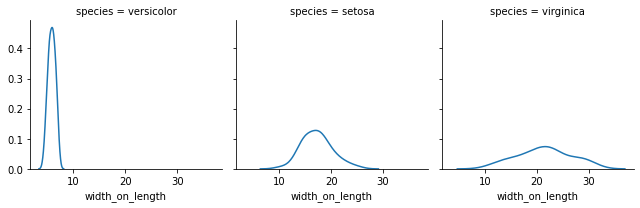

In [31]:
plot = sns.FacetGrid(iris, col='species')
plot.map(sns.kdeplot, 'width_on_length')
plot

### Задание 2 (0.5 балла)

Визуализируйте распределение width_on_length для каждого класса из `species` с помощью функции `sns.boxplot` (все классы изобразите на одном графике).

<AxesSubplot:xlabel='species', ylabel='width_on_length'>

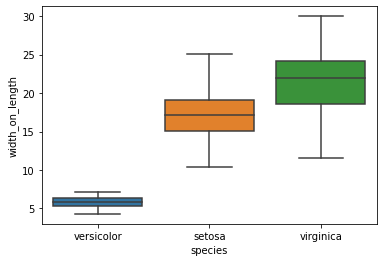

In [32]:
x = iris['species']
y = iris['width_on_length']

plot = sns.boxplot(data=iris, x=x, y=y)
plot

### Задание 3 (0.5 балла)

Постройте график зависимости `sepal_length` от `sepal_width` для класса `setosa` из `species` (в случае дублей в `sepal_width` - найдите среднее `sepal_length` для этого значения `sepal_width` и используйте его для построения графика)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

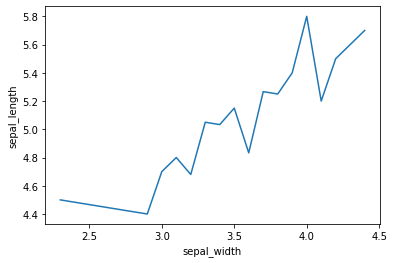

In [33]:
df = iris[iris['species'] == 'setosa'].groupby('sepal_width').mean()
plot = sns.lineplot(data=df['sepal_length'])
plot

### Задание 4 (1 балл)

Визуализируйте средние значения столбцов `sepal_length, sepal_width, petal_length, petal_width` для каждого класса из `species` в виде столбиковой диаграммы из любой библиотеки на ваш выбор, например `sns.barplot` или `pd.DataFrame.plot.bar` (изобразите все на одном графике).

Text(0.5, 1.0, 'virginica')

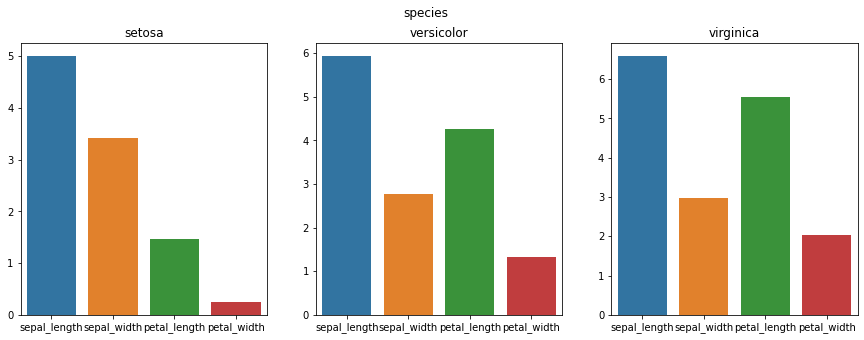

In [34]:
df = iris.drop('width_on_length', axis=1).groupby('species').mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('species')

sns.barplot(data=df.iloc[0].to_frame().T, ax=axes[0])
axes[0].set_title('setosa')

sns.barplot(data=df.iloc[1].to_frame().T, ax=axes[1])
axes[1].set_title('versicolor')

sns.barplot(data=df.iloc[2].to_frame().T, ax=axes[2])
axes[2].set_title('virginica')